# TALLER DE SELECCIÓN DE MODELOS

In [22]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV
from array import array

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
plt.rc('font', family='serif')

**ERROR DE LA TAREA ANTERIOR** [(taller de regresión lineal)](https://github.com/srcolinas/Machine_Learning_basico/blob/master/regresion_lineal.ipynb)
*NUNCA* se debe buscar el mejor modelo utilizando como referencia los datos de prueba. Para esto se deben usar unos datos validación, los cuales salen de los datos de entrenamiento y no se usan para entrenar. Una vez se escoja el mejor modelo, este se puede reentrenar usando todos los datos de entrenamiento disponibles.

In [24]:
X, y = load_diabetes(return_X_y=True)
X.shape

(442, 10)

In [25]:
poly = PolynomialFeatures(degree=1)
X_train, X_test, y_train, y_test = train_test_split(poly.fit_transform(X), y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [26]:
error_train = array('f')
error_val = array('f')
for alpha in np.arange(0.01, 0.2, 0.02):
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    print("-----------Usando alpha={}---------------".format(alpha))
    MAE_train = float(mean_absolute_error(y_train, ridge_regressor.predict(X_train)))
    print('Error de entrenamiento:',MAE_train)
    error_train.append(MAE_train)
    MAE_val = float(mean_absolute_error(y_val, ridge_regressor.predict(X_val)))
    print('Error de validación:', MAE_val)
    error_val.append(MAE_val)
    print('Coeficiente más grande:', np.max(ridge_regressor.coef_.reshape(-1)))
    print('Coeficiente más pequeño:', np.min(ridge_regressor.coef_.reshape(-1)))
    print('Numero de zeros:', np.sum(np.abs(ridge_regressor.coef_.reshape(-1))<0.0001))

-----------Usando alpha=0.01---------------
Error de entrenamiento: 46.206443415821305
Error de validación: 41.95898278691201
Coeficiente más grande: 655.353500277
Coeficiente más pequeño: -300.648079793
Numero de zeros: 1
-----------Usando alpha=0.03---------------
Error de entrenamiento: 46.411343610231604
Error de validación: 41.86455527359361
Coeficiente más grande: 632.449308467
Coeficiente más pequeño: -269.380683636
Numero de zeros: 1
-----------Usando alpha=0.049999999999999996---------------
Error de entrenamiento: 46.60329616488648
Error de validación: 41.9003013897367
Coeficiente más grande: 610.515889886
Coeficiente más pequeño: -250.525464025
Numero de zeros: 1
-----------Usando alpha=0.06999999999999999---------------
Error de entrenamiento: 46.791251131382126
Error de validación: 41.992552888596855
Coeficiente más grande: 590.066591618
Coeficiente más pequeño: -237.566146747
Numero de zeros: 1
-----------Usando alpha=0.08999999999999998---------------
Error de entrenamie

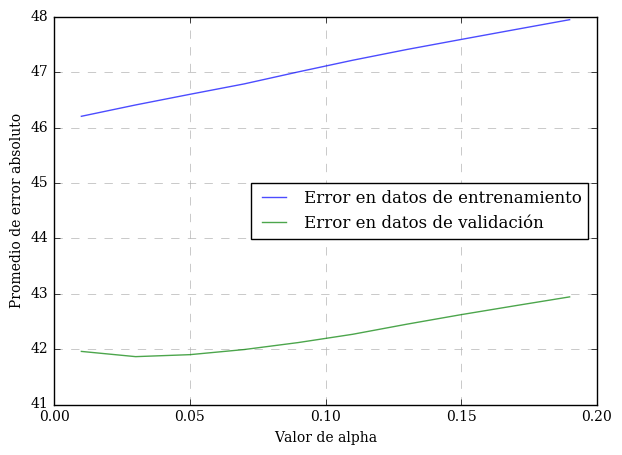

In [27]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)

ax.plot(np.arange(0.01, 0.2, 0.02), error_train, color='b', alpha=0.7, label='Error en datos de entrenamiento')
ax.plot(np.arange(0.01, 0.2, 0.02), error_val, color='g', alpha=0.7, label='Error en datos de validación')

ax.grid(linestyle='--',color='0.7')
ax.set_ylabel('Promedio de error absoluto')
ax.set_xlabel('Valor de alpha')
ax.legend(loc='best')

In [28]:
error_train = array('f')
error_val = array('f')
for alpha in np.arange(0.01, 0.2, 0.02):
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    print("-----------Usando alpha={}---------------".format(alpha))
    MAE_train = float(mean_absolute_error(y_train, lasso_regressor.predict(X_train)))
    print('Error de entrenamiento:',MAE_train)
    error_train.append(MAE_train)
    MAE_val = float(mean_absolute_error(y_val, lasso_regressor.predict(X_val)))
    print('Error de validación:', MAE_val)
    error_val.append(MAE_val)
    print('Coeficiente más grande:', np.max(lasso_regressor.coef_.reshape(-1)))
    print('Coeficiente más pequeño:', np.min(lasso_regressor.coef_.reshape(-1)))
    print('Numero de zeros:', np.sum(np.abs(lasso_regressor.coef_.reshape(-1))<0.0001))

-----------Usando alpha=0.01---------------
Error de entrenamiento: 46.18896430222597
Error de validación: 42.008423800628684
Coeficiente más grande: 666.253079376
Coeficiente más pequeño: -293.947318225
Numero de zeros: 3
-----------Usando alpha=0.03---------------
Error de entrenamiento: 46.34939634485592
Error de validación: 41.994623406963456
Coeficiente más grande: 665.623283866
Coeficiente más pequeño: -272.069077384
Numero de zeros: 3
-----------Usando alpha=0.049999999999999996---------------
Error de entrenamiento: 46.52668237072867
Error de validación: 42.15177278635143
Coeficiente más grande: 666.285829741
Coeficiente más pequeño: -281.023791465
Numero de zeros: 4
-----------Usando alpha=0.06999999999999999---------------
Error de entrenamiento: 46.66980160271884
Error de validación: 42.338593664122186
Coeficiente más grande: 664.314358446
Coeficiente más pequeño: -269.598225096
Numero de zeros: 5
-----------Usando alpha=0.08999999999999998---------------
Error de entrenamie

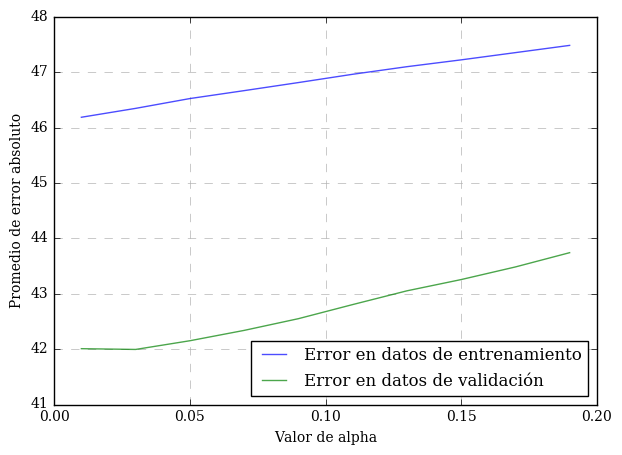

In [29]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)

ax.plot(np.arange(0.01, 0.2, 0.02), error_train, color='b', alpha=0.7, label='Error en datos de entrenamiento')
ax.plot(np.arange(0.01, 0.2, 0.02), error_val, color='g', alpha=0.7, label='Error en datos de validación')

ax.grid(linestyle='--',color='0.7')
ax.set_ylabel('Promedio de error absoluto')
ax.set_xlabel('Valor de alpha')
ax.legend(loc='best')

**Qué grado del polinomio se debe escoger?**

In [30]:
error_train = array('f')
error_val = array('f')
for i in range(1,8):
    poly = PolynomialFeatures(degree=i)
    X_train, X_test, y_train, y_test = train_test_split(poly.fit_transform(X), y, test_size=0.33, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_val)
    print("-----------Usando degree={}---------------".format(i))
    MAE_train = float(mean_absolute_error(y_train, regressor.predict(X_train)))
    print('Error de entrenamiento:',MAE_train)
    error_train.append(MAE_train)
    MAE_val = float(mean_absolute_error(y_val, regressor.predict(X_val)))
    print('Error de validación:', MAE_val)
    error_val.append(MAE_val)
    print('Coeficiente más grande:', np.max(regressor.coef_.reshape(-1)))
    print('Coeficiente más pequeño:', np.min(regressor.coef_.reshape(-1)))
    print('Numero de zeros:', np.sum(np.abs(regressor.coef_.reshape(-1))<0.0001))

-----------Usando degree=1---------------
Error de entrenamiento: 46.09243702175708
Error de validación: 42.09448347069841
Coeficiente más grande: 665.464572792
Coeficiente más pequeño: -315.667649655
Numero de zeros: 1
-----------Usando degree=2---------------
Error de entrenamiento: 43.75252525252525
Error de validación: 65.87755102040816
Coeficiente más grande: 4.00341892806e+16
Coeficiente más pequeño: -895568.061026
Numero de zeros: 0
-----------Usando degree=3---------------
Error de entrenamiento: 1.64599019038665e-11
Error de validación: 342.2008994094964
Coeficiente más grande: 1503445.30375
Coeficiente más pequeño: -2047919.08088
Numero de zeros: 1
-----------Usando degree=4---------------
Error de entrenamiento: 6.634459536181024e-12
Error de validación: 225.89290197884586
Coeficiente más grande: 733312.999113
Coeficiente más pequeño: -1020973.11849
Numero de zeros: 1
-----------Usando degree=5---------------
Error de entrenamiento: 1.0695462473027285e-11
Error de validación

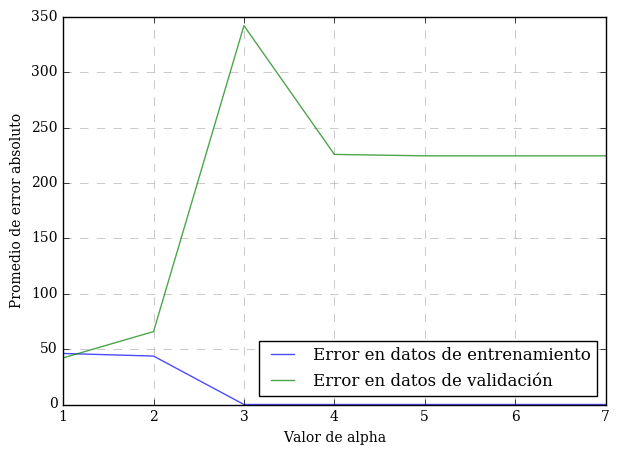

In [31]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)

ax.plot(range(1,8), error_train, color='b', alpha=0.7, label='Error en datos de entrenamiento')
ax.plot(range(1,8), error_val, color='g', alpha=0.7, label='Error en datos de validación')

ax.grid(linestyle='--',color='0.7')
ax.set_ylabel('Promedio de error absoluto')
ax.set_xlabel('Valor de alpha')
ax.legend(loc='best')

**Qué pasa si usamos alguna regularización y un polinomio de orden 4?**

In [32]:
poly = PolynomialFeatures(degree=4)
X_train, X_test, y_train, y_test = train_test_split(poly.fit_transform(X), y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [33]:
X_train.shape

(198, 1001)

In [34]:
error_train = array('f')
error_val = array('f')
for alpha in np.arange(0.01, 0.2, 0.02):
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    print("-----------Usando alpha={}---------------".format(alpha))
    MAE_train = float(mean_absolute_error(y_train, lasso_regressor.predict(X_train)))
    print('Error de entrenamiento:',MAE_train)
    error_train.append(MAE_train)
    MAE_val = float(mean_absolute_error(y_val, lasso_regressor.predict(X_val)))
    print('Error de validación:', MAE_val)
    error_val.append(MAE_val)
    print('Coeficiente más grande:', np.max(lasso_regressor.coef_.reshape(-1)))
    print('Coeficiente más pequeño:', np.min(lasso_regressor.coef_.reshape(-1)))
    print('Numero de zeros:', np.sum(np.abs(lasso_regressor.coef_.reshape(-1))<0.0001))

-----------Usando alpha=0.01---------------
Error de entrenamiento: 43.23789257330331
Error de validación: 44.46852622351813
Coeficiente más grande: 3090.29829234
Coeficiente más pequeño: -290.088680594
Numero de zeros: 984
-----------Usando alpha=0.03---------------
Error de entrenamiento: 46.19758357319833
Error de validación: 42.114102912572335
Coeficiente más grande: 666.880715083
Coeficiente más pequeño: -268.185943174
Numero de zeros: 992
-----------Usando alpha=0.049999999999999996---------------
Error de entrenamiento: 46.52668237072867
Error de validación: 42.15177278635143
Coeficiente más grande: 666.285829741
Coeficiente más pequeño: -281.023791465
Numero de zeros: 994
-----------Usando alpha=0.06999999999999999---------------
Error de entrenamiento: 46.66980160271884
Error de validación: 42.338593664122186
Coeficiente más grande: 664.314358446
Coeficiente más pequeño: -269.598225096
Numero de zeros: 995
-----------Usando alpha=0.08999999999999998---------------
Error de ent

In [35]:
error_train = array('f')
error_val = array('f')
for alpha in np.arange(0.01, 0.2, 0.02):
    lasso_regressor = Lasso(alpha=alpha, fit_intercept=False)
    lasso_regressor.fit(X_train, y_train)
    print("-----------Usando alpha={}---------------".format(alpha))
    MAE_train = float(mean_absolute_error(y_train, lasso_regressor.predict(X_train)))
    print('Error de entrenamiento:',MAE_train)
    error_train.append(MAE_train)
    MAE_val = float(mean_absolute_error(y_val, lasso_regressor.predict(X_val)))
    print('Error de validación:', MAE_val)
    error_val.append(MAE_val)
    print('Coeficiente más grande:', np.max(lasso_regressor.coef_.reshape(-1)))
    print('Coeficiente más pequeño:', np.min(lasso_regressor.coef_.reshape(-1)))
    print('Numero de zeros:', np.sum(np.abs(lasso_regressor.coef_.reshape(-1))<0.0001))

-----------Usando alpha=0.01---------------
Error de entrenamiento: 43.235465436634705
Error de validación: 44.468833097758036
Coeficiente más grande: 3094.14547625
Coeficiente más pequeño: -289.366866192
Numero de zeros: 983
-----------Usando alpha=0.03---------------
Error de entrenamiento: 46.191120870816206
Error de validación: 42.11732185521275
Coeficiente más grande: 666.939958959
Coeficiente más pequeño: -268.093523676
Numero de zeros: 991
-----------Usando alpha=0.049999999999999996---------------
Error de entrenamiento: 46.521680309340525
Error de validación: 42.14811240940272
Coeficiente más grande: 666.311285417
Coeficiente más pequeño: -280.967114007
Numero de zeros: 993
-----------Usando alpha=0.06999999999999999---------------
Error de entrenamiento: 46.66283126981002
Error de validación: 42.33171550210169
Coeficiente más grande: 664.364974395
Coeficiente más pequeño: -269.534491273
Numero de zeros: 994
-----------Usando alpha=0.08999999999999998---------------
Error de e

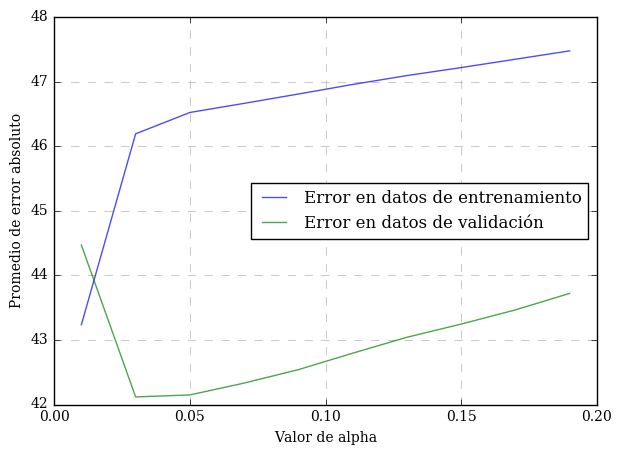

In [36]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)

ax.plot(np.arange(0.01, 0.2, 0.02), error_train, color='b', alpha=0.7, label='Error en datos de entrenamiento')
ax.plot(np.arange(0.01, 0.2, 0.02), error_val, color='g', alpha=0.7, label='Error en datos de validación')

ax.grid(linestyle='--',color='0.7')
ax.set_ylabel('Promedio de error absoluto')
ax.set_xlabel('Valor de alpha')
ax.legend(loc='best')

**Cómo automatizar este primer este proceso?** 
1. Necesitamos un modelo que haga la transformación polonomial y el ajuste en un paso
2. Necesitamos buscar el mejor de todos las posibles combinaciones de parámetros (grado de polinomio y nivel de regularización)

In [37]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
estimator = Pipeline([('poly', PolynomialFeatures()), ('lasso', Lasso())])
estimator.get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'poly': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'steps': [('poly',
   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False))]}

In [43]:
param_grid = {'poly__degree':range(1,10), 'lasso__alpha':np.arange(0.01, 0.2, 0.01)}
param_grid

{'lasso__alpha': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
         0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19]),
 'poly__degree': range(1, 10)}

In [44]:
regressor = GridSearchCV(estimator, param_grid)
regressor

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'poly__degree': range(1, 10), 'lasso__alpha': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
regressor.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'poly__degree': range(1, 10), 'lasso__alpha': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
regressor.best_params_

{'lasso__alpha': 0.13, 'poly__degree': 1}

## TAREA:
Mirar el modelo de retos que se sigue en [colomb-ia](https://github.com/colomb-ia/retos) y luego:
1. Crear un repositorio para proponer un reto de regresión siguiendo ese formato
2. Proponer una solución inicial para ese reto
3. Proponer una solución a [colomb-ia](https://github.com/colomb-ia/retos) en el reto [S-curve](https://github.com/colomb-ia/retos)